In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [24]:
debtPeriodDf = np.random.normal(loc=0, scale=5000, size=10000)
debtPeriodDf = pd.DataFrame(debtPeriodDf)
debtPeriodDf = debtPeriodDf.rename(columns={0 : 'debtPeriod'})

min_val = debtPeriodDf.min()
max_val = debtPeriodDf.max()

debtPeriodDf = 150 * (debtPeriodDf - min_val) / (max_val - min_val)
print(debtPeriodDf)

TypeError: random() got an unexpected keyword argument 'scale'

In [9]:
debtSumDf = np.random.normal(loc=0, scale=1, size=10000)
debtSumDf = pd.DataFrame(debtSumDf)
debtSumDf = debtSumDf.rename(columns={0 : 'debtSum'})

min_val = debtSumDf.min()
max_val = debtSumDf.max()

debtSumDf = 100 * (debtSumDf - min_val) / (max_val - min_val) + 20
print(debtSumDf)

        debtSum
0     68.542078
1     72.941757
2     91.273150
3     78.504893
4     79.670417
...         ...
9995  66.587279
9996  89.729491
9997  72.105871
9998  69.990256
9999  63.050786

[10000 rows x 1 columns]


In [10]:
def randomBool(prob):
    return random.random() < prob

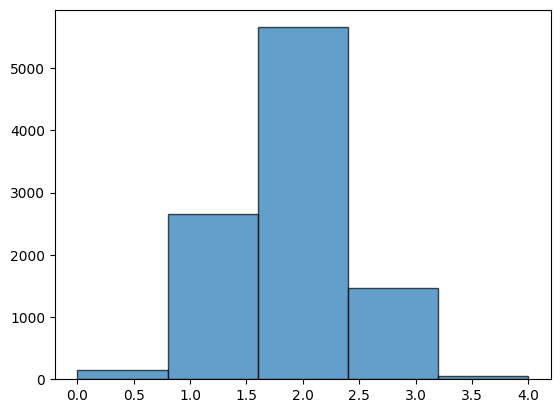

In [18]:
p = [30, 60, 90, 120]
debtCountExtInGroupDf = [0,0,0,0,0]
debtCountInGroupDf = [0,0,0,0,0]
debtExtDf = []
debtExtGroupDf = []
for i in debtPeriodDf['debtPeriod']:
    if i < p[0]:
        debtExtGroupDf.append(0)
        a = randomBool(0.1)
        debtExtDf.append(a)
        debtCountInGroupDf[0] += 1
        if a:
            debtCountExtInGroupDf[0] += 1
    elif i < p[1]:
        debtExtGroupDf.append(1)
        a = randomBool(0.3)
        debtExtDf.append(a)
        debtCountInGroupDf[1] += 1
        if a:
            debtCountExtInGroupDf[1] += 1
    elif i < p[2]:
        debtExtGroupDf.append(2)
        a = randomBool(0.5)
        debtExtDf.append(a)
        debtCountInGroupDf[2] += 1
        if a:
            debtCountExtInGroupDf[2] += 1
    elif i < p[3]:
        debtExtGroupDf.append(3)
        a = randomBool(0.7)
        debtExtDf.append(a)
        debtCountInGroupDf[3] += 1
        if a:
            debtCountExtInGroupDf[3] += 1
    else:
        debtExtGroupDf.append(4)
        a = randomBool(0.9)
        debtExtDf.append(a)
        debtCountInGroupDf[4] += 1
        if a:
            debtCountExtInGroupDf[4] += 1


plt.hist(debtExtGroupDf, bins=5, edgecolor='black', alpha=0.7)
plt.show()

In [19]:
df0 = pd.merge(debtPeriodDf, debtSumDf, left_index=True, right_index=True)
debtExtDf = pd.DataFrame(debtExtDf)
debtExtDf = debtExtDf.rename(columns={0 : 'debtExt'})
debtExtGroupDf = pd.DataFrame(debtExtGroupDf)
debtExtGroupDf = debtExtGroupDf.rename(columns={0 : 'debtExtGroup'})
df1 = pd.merge(debtExtDf, debtExtGroupDf, left_index=True, right_index=True)
df = pd.merge(df0, df1, left_index=True, right_index=True)
print(df)

      debtPeriod    debtSum  debtExt  debtExtGroup
0      80.721907  68.542078     True             2
1      88.243230  72.941757    False             2
2      46.849627  91.273150    False             1
3      79.182342  78.504893    False             2
4      64.107753  79.670417    False             2
...          ...        ...      ...           ...
9995   86.832976  66.587279    False             2
9996   57.550818  89.729491    False             1
9997   79.001181  72.105871     True             2
9998   61.559461  69.990256    False             2
9999   78.390657  63.050786     True             2

[10000 rows x 4 columns]


In [20]:
debtPer = []
debtPer1 = []
for i in range(5):
    debtPer1.append(1 - (debtCountExtInGroupDf[i]/debtCountInGroupDf[i]))
    debtPer.append((debtCountExtInGroupDf[i]/debtCountInGroupDf[i]))

print(debtPer)

categories = ['0 - 30', '30 - 60', '60 - 90', '90 - 120', '> 120']

[0.10191082802547771, 0.30402104472003005, 0.5029157094893091, 0.6955040871934605, 0.8909090909090909]


<function matplotlib.pyplot.show(close=None, block=None)>

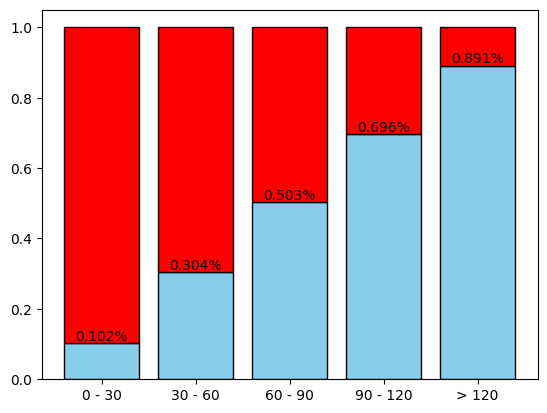

In [22]:
plt.bar(categories, debtPer, color = 'skyblue', edgecolor = 'black')
plt.bar(categories, debtPer1, bottom = debtPer, color = 'red', edgecolor = 'black')
for i, percent in enumerate(debtPer):
    plt.text(i, percent, f'{percent:.3f}%',  ha = 'center', va = 'bottom')
plt.show